# Part 1: Data preprocessing

dataset: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

## Importing the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/car data.csv')

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data explorating

In [ ]:
dataset.shape

(301, 9)

In [ ]:
# check the columns
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# columns with categorical values
dataset.select_dtypes(include=['object']).columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include=['object']).columns)

4

In [ ]:
# columns with numerical values
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

5

In [ ]:
# statistical summary
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Dealing with the missing data

In [ ]:
# check if there are any null values
dataset.isnull().values.any()

np.False_

In [ ]:
# check how many null values
dataset.isnull().values.sum()

np.int64(0)

## Restructure the dataset

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
dataset = dataset.drop(['Car_Name'], axis=1)

In [ ]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# add a column as current year
dataset['Current Year'] = 2025

In [ ]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2025,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2025,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2025,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2025,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2025,6


In [ ]:
dataset['years_old'] = dataset['Current Year'] - dataset['Year']

In [ ]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2025,11
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2025,12
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2025,8
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2025,14
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2025,11


In [ ]:
dataset = dataset.drop(columns=['Year', 'Current Year'])

In [ ]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


## Encoding the categorical data

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

3

In [ ]:
dataset['Fuel_Type'].nunique()

3

In [ ]:
dataset['Seller_Type'].nunique()

2

In [ ]:
dataset['Transmission'].nunique()

2

In [ ]:
dataset.shape

(301, 8)

In [ ]:
#one hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True, dtype=int)

In [ ]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,0,1,0,1
1,4.75,9.54,43000,0,12,1,0,0,1
2,7.25,9.85,6900,0,8,0,1,0,1
3,2.85,4.15,5200,0,14,0,1,0,1
4,4.60,6.87,42450,0,11,1,0,0,1


In [ ]:
dataset.shape

(301, 9)

## Correlation matrix and Heatmap

In [ ]:
dataset_2 = dataset.drop(columns='Selling_Price')

<Axes: title={'center': 'Correlation with charges'}>

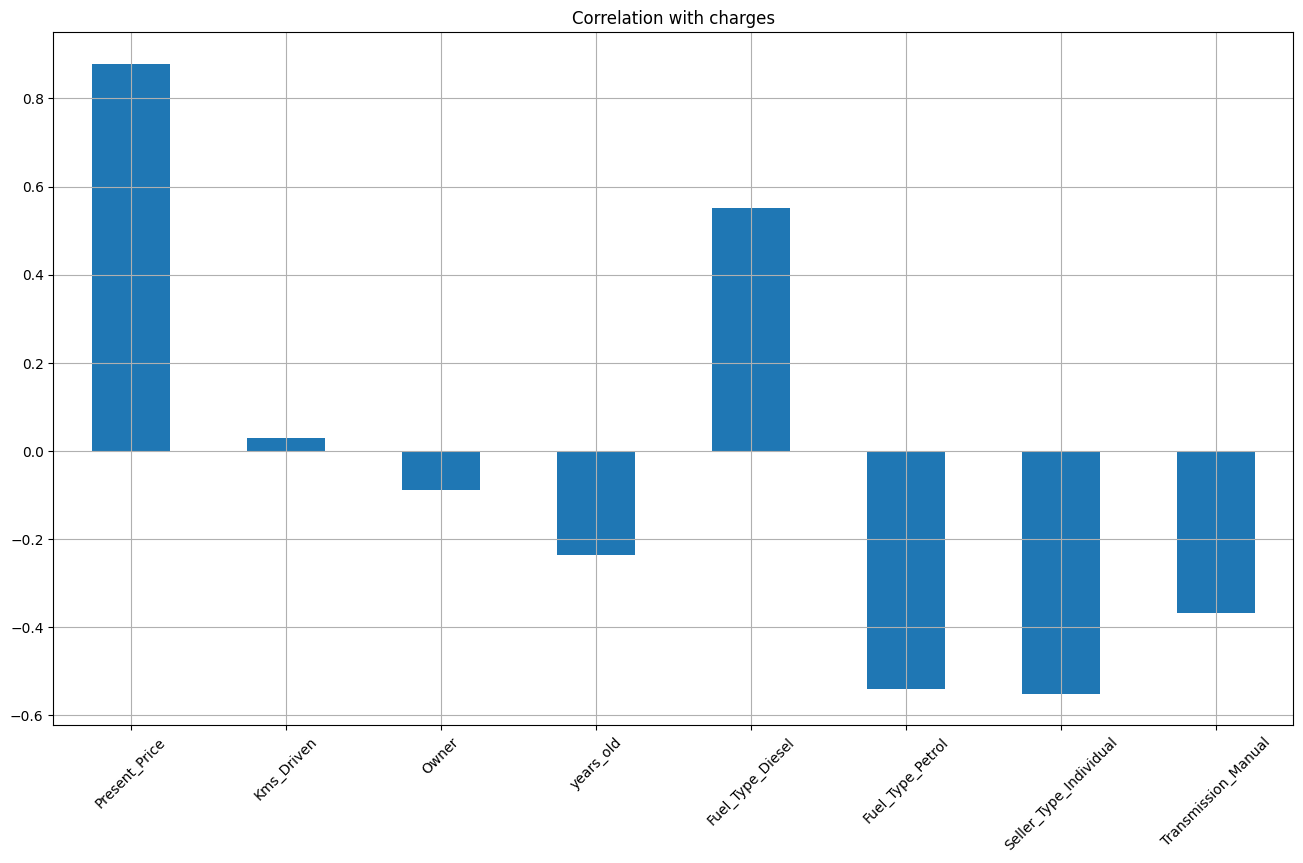

In [ ]:
dataset_2.corrwith(dataset['Selling_Price']).plot.bar(
    figsize=(16,9), title = 'Correlation with charges',
    rot = 45, grid = True
)

In [ ]:
# Create Correlation Matrix
corr = dataset.corr()

<Axes: >

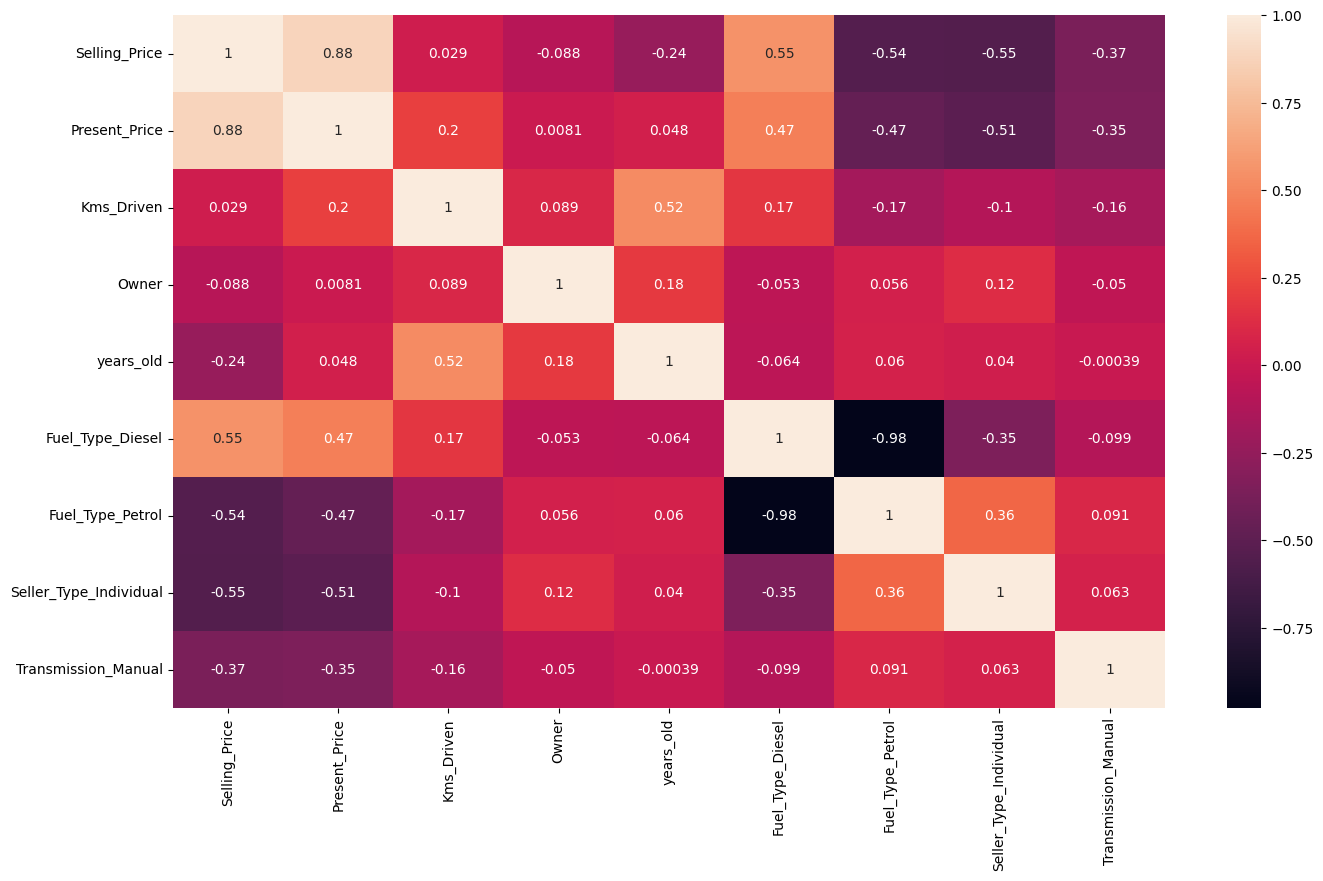

In [ ]:
# correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting the dataset into train and test set

In [ ]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,0,1,0,1
1,4.75,9.54,43000,0,12,1,0,0,1
2,7.25,9.85,6900,0,8,0,1,0,1
3,2.85,4.15,5200,0,14,0,1,0,1
4,4.60,6.87,42450,0,11,1,0,0,1


In [ ]:
# matrix of features
x = dataset.drop(columns='Selling_Price')

In [ ]:
# target variable
y = dataset['Selling_Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train.shape

(240, 8)

In [ ]:
x_test.shape

(61, 8)

In [ ]:
y_train.shape

(240,)

In [ ]:
y_test.shape

(61,)

## Feature scaling

In [ ]:
# we are not applying the features scaling for this specifics business problem

# Part 2: Building the model

## 1) Multiple linear regression

In [ ]:
# linear regression model
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor_mlr.predict(x_test)

In [ ]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.765593297976744

## 2)  Random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = regressor_rf.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.963956338962404

# Part 3: Find the optimal parameters using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
    }

In [ ]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squared_error', 'absolute_error'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
random_cv = RandomizedSearchCV(estimator = regressor_rf, param_distributions = parameters, n_iter=50,
                                   scoring='roc_auc', cv = 5, verbose=2, n_jobs = -1)

In [ ]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='roc_auc', verbose=2)

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=20, n_estimators=800)

In [ ]:
random_cv.best_params_

{'n_estimators': 800,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'absolute_error'}

# Part 4: Final model (Random forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=20, n_estimators=800)
regressor.fit(x_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=20, n_estimators=800)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7083402305288071

# Part 5: Predict charges for a car

In [ ]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,0,1,0,1
1,4.75,9.54,43000,0,12,1,0,0,1
2,7.25,9.85,6900,0,8,0,1,0,1
3,2.85,4.15,5200,0,14,0,1,0,1
4,4.60,6.87,42450,0,11,1,0,0,1


In [ ]:
single_obs = [[8.50, 3500, 0, 5, 1, 0, 0, 1]]

In [ ]:
regressor.predict(single_obs)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([9.92535625])